## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [223]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [224]:
#Upload and read ab_data.csv

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [225]:
#Find the number of rows

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**Answer:** 294.478

c. The number of unique users in the dataset.

In [226]:
#Unique user

df.user_id.nunique()

290584

d. The proportion of users converted.

In [227]:
#% of users converted

df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [228]:
#Count the number of lines where new_page and control are aligned. Do the same for the old page and treatment. 
#Finally add them up to have the final number

df_newpage_control_aligned = df.query('landing_page == "new_page" and group == "control"').count()[0] 

df_old_page_treatment_aligned = df.query('landing_page == "old_page" and group == "treatment"').count()[0]

df_newpage_control_aligned + df_old_page_treatment_aligned

3893

f. Do any of the rows have missing values?

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**Answer:** Taking a look at the information provided above, I conclude there are no missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [139]:
# Dropping the lines where a mismatch occurs

df.drop(df.query("group == 'treatment' and landing_page == 'old_page' ").index, inplace = True)

df.drop(df.query("group == 'control' and landing_page == 'new_page' ").index, inplace = True)

In [140]:
# Double check if all of the correct rows were removed 

df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

0

**Answer:** Correct, zero rows with group treatment equal to landing new page


In [141]:
# Saving the file as ab_data_cleaned and importing the cleaned file as df2

df.to_csv('ab_data_clean.csv', index = False)

df2 = pd.read_csv('ab_data_clean.csv')

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [142]:
df2.nunique()['user_id']

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [143]:
#Finding the user ID with the duplicated function

df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [144]:
#Filter df2 on the user_id found in the query above

df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [145]:
#Remove line 1876

df2.drop(labels = 1876, axis=0, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [232]:
#Compute the mean

df2.converted.mean()


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [233]:
#Filter on control group and compute the mean on the one's who were converted

control_convert = df2[df2['group']=='control']['converted'].mean()

control_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [234]:
#Filter on treatment group and compute the mean on the one's who were converted

treatment_convert = df2[df2['group']=='treatment']['converted'].mean()

treatment_convert

0.11880806551510564

d. What is the probability that an individual received the new page?

In [235]:
#Filter on the new landing page to then divide by the number of total landing page (old and new) and get the probability

df_inter = df2[df2['landing_page']=='new_page'].count()/df2.shape[0]

df_inter['landing_page']

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** Bearing in mind the different probabilities that were computed for each of the groups (Control 12.03% and Treatment 11.88%) in terms of conversions, we can claim there is no sufficient evidence to conclude which page leads to more conversions. Further analysis needs to be undertaken.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis:** New page has either same coversion rate or worse than old page.

$$ H_0:  p_{old} \geq p_{new} $$ 

**Alternative Hypothesis:** New page beats old page in terms of conversion rates. 

$$ H_1: p_{old} \lt p_{new} $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [150]:
#Compute the proportion of converted rate assuming p_new and p_old are equal

p_new = df2['converted'].mean()

p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [151]:
#Computing the proportion of converted rate assuming p_new and p_old are equal

p_old = df2['converted'].mean()

p_old

0.11959708724499628

c. What is $n_{new}$?

In [152]:
#Nb of users with new page

n_new = df2.query('landing_page == "new_page"').count()[0]

n_new

145310

d. What is $n_{old}$?

In [153]:
#Nb of users with old page

n_old = df2.query('landing_page == "old_page"').count()[0]

n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [236]:
# Leveraging the binomial distribution to simulate a set of samples for the n_new transactions with probability p_new

new_page_converted =  np.random.binomial(1, p_new, n_new)

new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [237]:
# Leveraging the binomial distribution to simuate samples of n_old transactions with probability p_old

old_page_converted =  np.random.binomial(1, p_new,  n_new)

old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [238]:
# Computing the differences between the mean of each of the new_page and old_page probabilities

new_page_converted.mean() - old_page_converted.mean()


-0.0010391576629275312

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [241]:
# Building 10.000 samples and normalize the values 

p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    new_page_p = new_page_converted.mean()
    old_page_p = old_page_converted.mean()
    p_diffs.append(new_page_p - old_page_p)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [242]:
#Compute the actual difference

obs_diff = treatment_convert - control_convert

obs_diff

-0.0015782389853555567

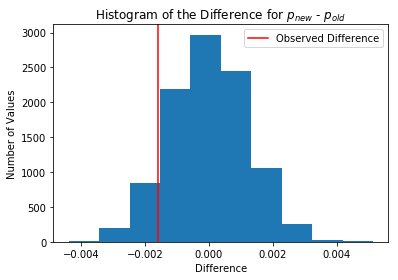

In [244]:
#Here, we compute the difference observed between the Treatment and Control group that 
# have been converted to see where it fits in the histogram
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.title('Histogram of the Difference for $p_{new}$ - $p_{old}$');
plt.xlabel('Difference');
plt.ylabel('Number of Values');
plt.axvline(obs_diff, color = 'red', label = "Observed Difference");
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [245]:
p_diffs = np.array(p_diffs)

p_value_1 = (p_diffs > obs_diff).mean()

p_value_1

0.9019

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Observed Difference:** The obs_diff represents the observed difference between the converted rates of the New Page and the Old page.

**Simulated Difference:** The p_diffs represents the 10,000 sample simulation based on the difference between converted rates of the New page and the Old page.

**P-Value Meaning:** The p-value of 0.905 suggests we fail to reject the Null Hypothesis under this scenario as we are clearly above the critical alpha measure of $\alpha$ = 0.05.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [168]:
#The first two queries allow us to pick the number of conversions for each of the pages. 
#While the two last queries allow us to pick the number of users per group who received each page.

import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').count()[0]

convert_new = df2.query('landing_page == "new_page" and converted == 1').count()[0]

n_old = df2.query('landing_page =="old_page"').count()[0]

n_new = df2.query('landing_page =="new_page"').count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [176]:
#Here, we compute the test statistic (z-score) and the p-value for the above portions

z_score, p_value_2 = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

z_score, p_value_2

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?


**Z-score:** The negative z-score obtained (-1.3109) underlies the failure to reject the Null Hypothesis (Info: The Z-score represent the number of standart deviations away from a point to the mean, a negative z-score reveals the raw score is below the mean average)

**P-Value:** Similarly to the p-value previously obtained (0.905 p_value_1) we fail to reject the Null hypothesis with a 0.905058 p-value

**Result:** Both of the scores (z-score and p-value) suggest that we fail to reject the Null Hypothesis

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** Since we will be using a binary variable for this part, we suggest to use the Logistic regression as the model to put in place.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [246]:
#Create the intercept 

df2['intercept'] = 1

#Create dummy variables 

df2[['control','ab_page']] = pd.get_dummies(df2['group'])

df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [247]:
#Drop the control column as we created the dummy ab_page variable

df2.drop(labels=['control'], axis=1,inplace=True)

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [248]:
#import statsmodel
import statsmodels.api as sm

log_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [249]:
#Summmary of the resuslts (FYI: summary2() had to be used as summary() was giving an error)

results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-09 12:19 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**P-Value of the Regression Model:** The p-value obtained with ab_page is 0.1899, which reveals the failure to reject the Null Hypothesis as we are still above the critical alpha target of 5%. 

**Differences:** The difference between the A/B Test (Part II) and the Regression Model (Part III) lies in the comparison they are making, the Part II verifies whether the new page has a higher convertion proportion in relation to the old page, while the Part III accounts for the relationship between variables.




f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other ideas:** We might consider other factors to the regression model as there could be other explanatory variables that influence the convertion, e.g. The duration of testing (timestamp)

**Advantages:** As previously mentioned, introducing the Timestamp variable could help determine when are the users more inclined to be converted. Hence, the interesting point here would be to verify if a high correlation exists between time and conversion.

**Disadvantages:** The biggest painpoint when adding explanatory variables links to the fact that a multicollinearity problem might exist, in short, this happens when two variables are related to another. A way to overcome this is to calculate the Variance Inflation Factor (VIIF) and verify which variables have high similar VIFF in order to remove at least one of them. We could mention correlation of errors, non-constant variables of erros and outliers as other problems to incorporation of other variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [251]:
#Import Dataset countries.csv

country_df = pd.read_csv('countries.csv')

country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [250]:
#Merge df2 and countries on "user_id" and quickly check the dataset

df = df2.merge(country_df, on='user_id', how='inner')


df.info(), df.country.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 8 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
country         290584 non-null object
dtypes: int64(3), object(4), uint8(1)
memory usage: 18.0+ MB


(None, array(['US', 'CA', 'UK'], dtype=object))

In [252]:
#Shortly compute the conversion mean for each country

df.groupby('country').mean()

,user_id,converted,intercept,ab_page
country,,,,
CA,788640.270639,0.115318,1.0,0.503552
UK,787678.848246,0.120594,1.0,0.498247
US,788075.662148,0.119547,1.0,0.500459


In [253]:
# Create the necessary dummy variables

df[['CA', 'UK', 'US']] = pd.get_dummies(df['country'])


In [254]:
#Drop the country and UK column as we created the dummy CA and US variables

df = df.drop(['country', 'UK'], axis=1)

df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [256]:
# Fit the Linear Model


log_mod_2 = sm.Logit(df['converted'], df[['intercept', 'ab_page', 'CA', 'US']])

results_2 = log_mod_2.fit()

results_2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-09 12:21 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
==================================================================

"""

In [257]:
#Results for the Parameter

np.exp(results_2.params), 1 / np.exp(results_2.params)

(intercept    0.138154
 ab_page      0.985168
 CA           0.950621
 US           0.990165
 dtype: float64, intercept    7.238314
 ab_page      1.015056
 CA           1.051944
 US           1.009932
 dtype: float64)

**P-values:** All the p-values are above the critical alpha measure of  $\alpha$ = 0.05, meaning no statistical evidence is found.

** Countries and Conversion:** The odds of conversion for all the 3 countries are equally close to 1, meaning the data does not translate into any insightful information as none of the countries has a clear influence on the conversion rate. 

**Conclusion:** As a short summary, we highly recommend keeping the old page as the main page for our e-commerce client website. This outcome assumption is clearly backed by the tests that were previously computed and shows that no statistical evidence was found on the data that was analyzed.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.